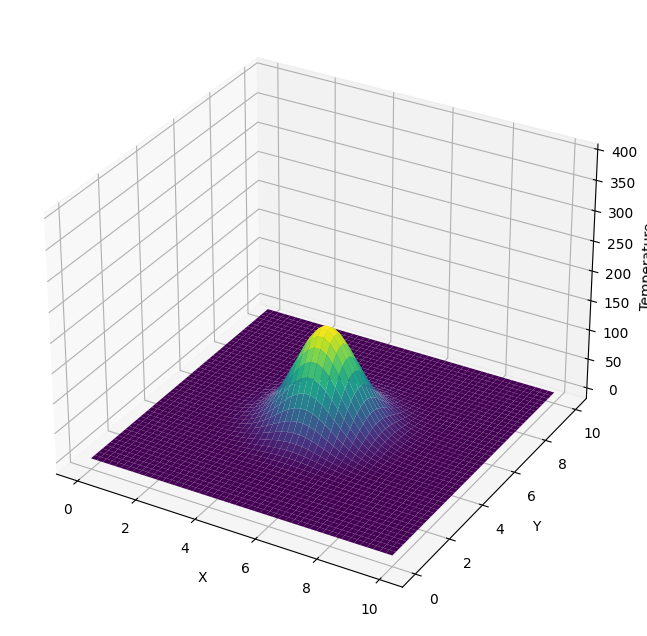

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Set the parameters
Lx = Ly = 10  # domain size
nx = ny = 50  # number of grid points
dx = Lx / (nx - 1)  # space step in x direction
dy = Ly / (ny - 1)  # space step in y direction
a = 0.1  # diffusion coefficient
dt = 0.01  # time step
nt = 200  # number of time steps
T_avg = 200
# Ensure stability with the CFL condition
mu = a * dt / (2 * dx**2)
assert mu < 0.5, "CFL condition not met, reduce the time step or increase the grid spacing."

# Create meshgrid for x and y
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Initial conditions: Gaussian centered in the domain
u0 = np.exp(-((X - Lx / 2)**2 + (Y - Ly / 2)**2))*T_avg*1.5
u = u0.flatten()
# Define diagonals

# Define the number of points in the grid
N = nx * ny

# Define the diagonals
main_diag = -4 * np.ones(N)
side_diag = np.ones(N-1)
up_down_diag = np.ones(N-nx)

# Prepare offsets for the diagonals
diagonals = [main_diag, side_diag, side_diag, up_down_diag, up_down_diag]

# Adjust the diagonals for periodic boundary conditions
for i in range(nx):
    diagonals[1][i * nx - 1] = 0  # Right boundary
    diagonals[2][i * nx] = 0  # Left boundary
diagonals[3][:nx] = 0  # Upper boundary
diagonals[4][-nx:] = 0  # Lower boundary

# Create the sparse matrix using diags
offsets = [0, -1, 1, -nx, nx]
A = diags(diagonals, offsets, shape=(N, N), format='csr')

# Crank-Nicolson matrix
I = diags([np.ones(N)], [0], shape=(N, N), format='csr')  # Identity matrix
CN_matrix = I - mu * A
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Now, we will correct the update function for the animation
def update(i):
    global u
    # Crank-Nicolson step
    u_new = spsolve(CN_matrix, u + mu * (A @ u))
    
    # Update the solution
    u = u_new
    
    # Clear the previous frame
    ax.cla()
    
    # Reshape the solution for 2D plotting
    U = u.reshape((ny, nx))
    
    # Plot the surface
    wframe = ax.plot_surface(X, Y, U, cmap='viridis')
    
    # Setting the axes properties
    ax.set_zlim(-10, 2*T_avg)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Temperature')

    return wframe,

# Create animation
ani = FuncAnimation(fig, update, frames=nt, blit=False)
ani.save('diffusion_2d.mp4', fps=20)
# Display the animation
# plt.show()
